  deceptive   hotel  polarity       source  \
0  truthful  conrad  positive  TripAdvisor   
1  truthful   hyatt  positive  TripAdvisor   
2  truthful   hyatt  positive  TripAdvisor   
3  truthful    omni  positive  TripAdvisor   
4  truthful   hyatt  positive  TripAdvisor   

                                                text  
0  We stayed for a one night getaway with family ...  
1  Triple A rate with upgrade to view room was le...  
2  This comes a little late as I'm finally catchi...  
3  The Omni Chicago really delivers on all fronts...  
4  I asked for a high floor away from the elevato...  
Accuracy: 0.878125
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.86      0.89      0.87       152
    truthful       0.90      0.87      0.88       168

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



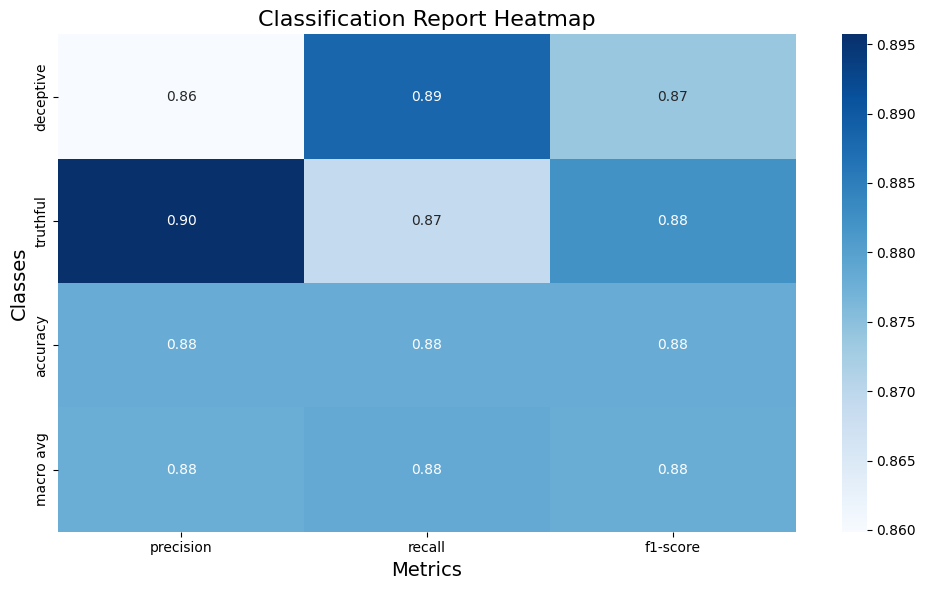

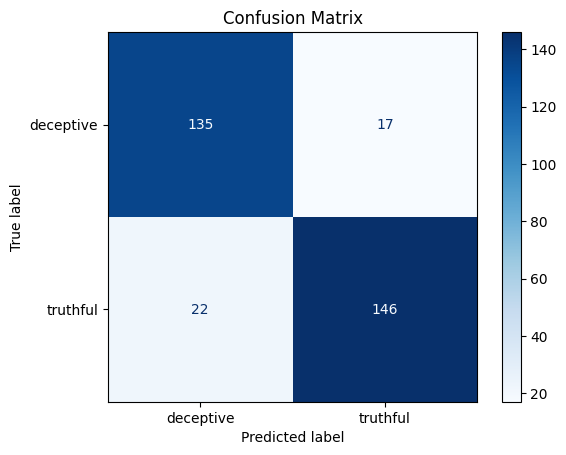

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/deception-opinion/deceptive-opinion.csv')
print(df.head())

# Preprocess the text data
df['text'] = df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)  # Lowercase and remove punctuation

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # You can tune max_features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

# Display accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the classification report as a heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Classes", fontsize=14)
plt.tight_layout()
plt.show()

# Optional: Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_tfidf, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
